In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.image import imread
%matplotlib inline
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder # one-hot encoding for age
from keras.utils import to_categorical
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
import os
import sys
sns.set_theme()

import tensorflow 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical
from sklearn import metrics
from matplotlib import cm
import itertools
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import datasets, layers, models
import pyspark
from pyspark import SparkContext
import findspark 
import re

In [150]:
Forbes = pd.read_excel('Forbes-2021.xlsx', header = 0)
ForbesM = Forbes['Sales'].apply(lambda date: date.split(' M')[0])
#Forbes['Sales'] = Forbes['Sales'].astype('str').apply(lambda date: date.split(' B')[0])
#Forbes['Sales'] = Forbes['Sales'].apply(lambda date: date.split(' M')[0])
Forbes['Sales'] = Forbes['Sales'].apply(lambda date: date.split('$')[1])
Forbes['Sales'] = Forbes['Sales'].apply(lambda date: date.split("''")[0])
Forbes['Sales'] = Forbes['Sales'].apply(str)
Forbes['Profit'] = Forbes['Profit'].astype('str').apply(lambda date: date.split('$')[1])
#Forbes['Assets'] = Forbes['Assets'].astype('str').apply(lambda date: date.split('$')[1])
Forbes['Market Value'] = Forbes['Market Value'].astype('str').apply(lambda date: date.split('$')[1])
#Forbes['Sales'] = Forbes['Sales'].astype('float') 
Forbes
#Forbes.sort_values(by = ['Sales'], ascending = False).head(130)

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1.0,ICBC,China,190.5 B,45.8 B,"$4,914.7 B",249.5 B,2021
1,2.0,JPMorgan Chase,United States,136.2 B,40.4 B,"$3,689.3 B",464.8 B,2021
2,3.0,Berkshire Hathaway,United States,245.5 B,42.5 B,$873.7 B,624.4 B,2021
3,4.0,China Construction Bank,China,173.5 B,39.3 B,"$4,301.7 B",210.4 B,2021
4,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7 B,49.3 B,$510.3 B,"1,897.2 B",2021
...,...,...,...,...,...,...,...,...
2095,1976.0,JTEKT,Japan,13.1 B,-34.9 M,$12 B,3.5 B,2021
2096,1976.0,Insurance Australia Group,Australia,5.4 B,-212 M,$25 B,9.3 B,2021
2097,1979.0,Sumec Corporation,China,13 B,79.2 M,$7.1 B,1.3 B,2021
2098,1979.0,Gold Fields,South Africa,3.9 B,718.1 M,$7.5 B,8.9 B,2021


In [45]:
CD_cent2 = []
for x in Forbes['Sales']:
    try:
        CD_cent2.append('%s' % x)
    except ValueError:
        pass


In [159]:
B = 1000
import math
FM = Forbes[Forbes['Sales'].astype('str').apply(lambda row: 'M' in row)]
FB = Forbes[Forbes['Sales'].astype('str').apply(lambda row: 'B' in row)]
FB['Sales'] = FB['Sales'].apply(lambda date: date.split('B')[0])
FB['Sales'].astype('float')
FB['Sales'] = FB['Sales'].astype('float').apply(lambda row:  sum([row] * 1000))
FM['Sales'] = FM['Sales'].apply(lambda date: date.split(' M')[0])
FM['Sales'] = FM['Sales'].astype('float')

df = pd.concat([FB,FM], axis = 0)


#Début de nettoyage pour les colonnes Profit et Market Value, erreur sur la ligne Constellation brand et ICBC
PM = Forbes[Forbes['Profit'].astype('str').apply(lambda row: 'M' in row)]
PB = Forbes[Forbes['Profit'].astype('str').apply(lambda row: 'B' in row)]
PB['Profit'].apply(lambda date: date.split('B')[0])
#PB['Profit'].apply(lambda date: date.split('-')[0])
#PB['Profit'].astype('float')
#PB['Profit'] = PB['Profit'].astype('float').apply(lambda row:  sum([row] * 1000))
PM['Profit'] = PM['Profit'].apply(lambda date: date.split(' M')[0])
PM['Profit'] = PM['Profit'].astype('float')

MVM = Forbes[Forbes['Market Value'].astype('str').apply(lambda row: 'M' in row)]
MVB = Forbes[Forbes['Market Value'].astype('str').apply(lambda row: 'B' in row)]
MVB['Market Value'].apply(lambda date: date.split('B')[0])
MVB['Market Value'].apply(lambda date: date.split('.')[0])
#MVB['Market Value'].astype('float')
#MVB['Market Value'] = MVB['Market Value'].astype('float').apply(lambda row:  sum([row] * 1000))
MVM['Market Value'] = MVM['Market Value'].apply(lambda date: date.split(' M')[0])
MVM['Market Value'] = MVM['Market Value'].astype('float')
Lambda = MVB[MVB['Market Value'].astype('str').apply(lambda row: '249.5 B' in row)]
MVB[MVB['Market Value'].astype('str').apply(lambda row: '249.5 B' in row)]
PB[PB['Market Value'].astype('str').apply(lambda row: '45.8 B' in row)]

/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_4444/2433170606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FB['Sales'] = FB['Sales'].apply(lambda date: date.split('B')[0])
/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_4444/2433170606.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FB['Sales'] = FB['Sales'].astype('float').apply(lambda row:  sum([row] * 1000))
/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_4444/2433170606.py:8: SettingWithCopyWarning: 
A value

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
501,474.0,Constellation Brands,United States,8.6 B,2 B,$27.1 B,45.8 B,2021


/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


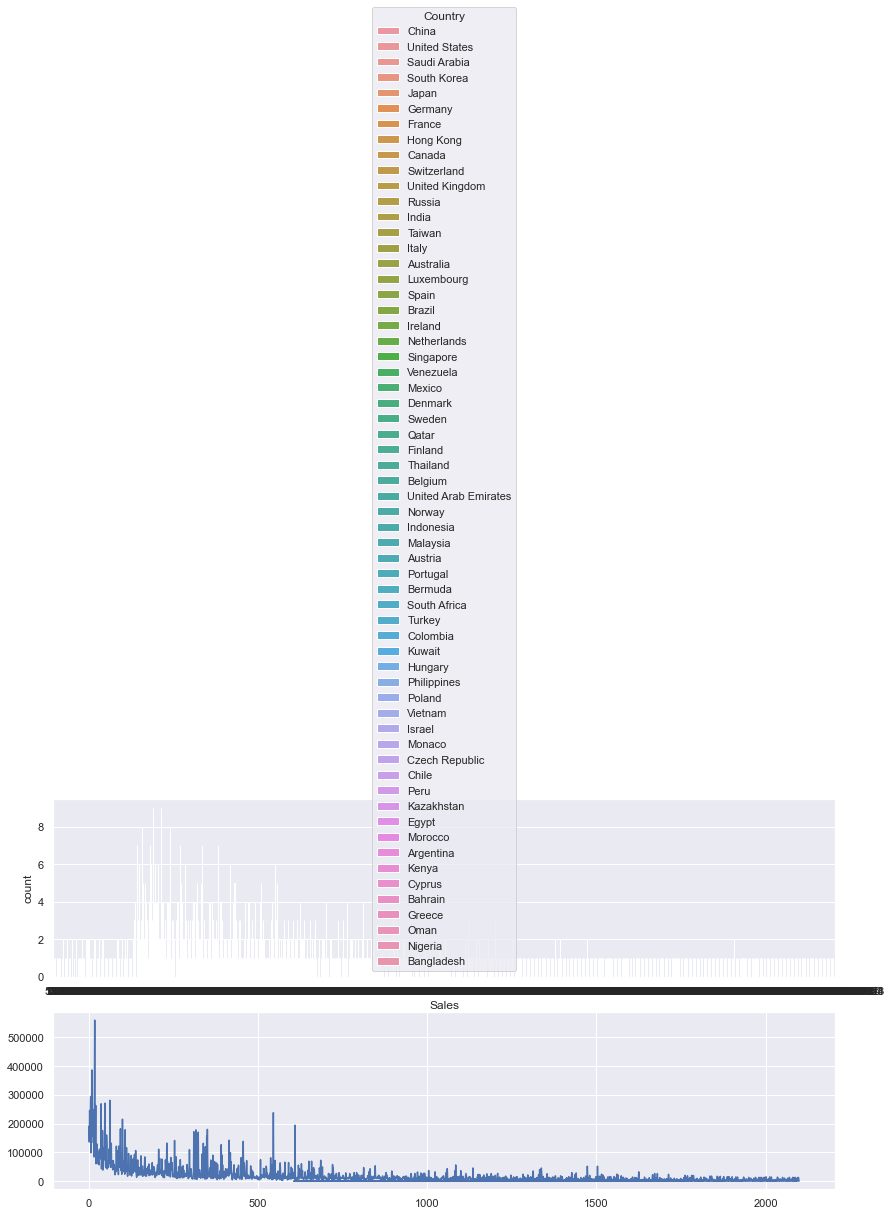

In [111]:
plt.figure(figsize=(14, 15))
plt.subplot(411)
sns.countplot('Sales', hue='Country', data=df)
plt.subplot(412)
plt.plot("Sales", data=df)
#plt.subplot(413)
#sns.countplot(x="quotes", data=quote[quote['quotes']<=10])

Forbes['Sales'] = Forbes['Sales'].apply(lambda c: c.split('$')[0])

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1.0,ICBC,China,,$45.8 B,"$4,914.7 B",$249.5 B,2021
1,2.0,JPMorgan Chase,United States,,$40.4 B,"$3,689.3 B",$464.8 B,2021
2,3.0,Berkshire Hathaway,United States,,$42.5 B,$873.7 B,$624.4 B,2021
3,4.0,China Construction Bank,China,,$39.3 B,"$4,301.7 B",$210.4 B,2021
4,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,,$49.3 B,$510.3 B,"$1,897.2 B",2021
...,...,...,...,...,...,...,...,...
2095,1976.0,JTEKT,Japan,,$-34.9 M,$12 B,$3.5 B,2021
2096,1976.0,Insurance Australia Group,Australia,,$-212 M,$25 B,$9.3 B,2021
2097,1979.0,Sumec Corporation,China,,$79.2 M,$7.1 B,$1.3 B,2021
2098,1979.0,Gold Fields,South Africa,,$718.1 M,$7.5 B,$8.9 B,2021
